Title - Tempreture forecasting using RNN.

Temperature forecasting using RNN (Recurrent Neural Network) is a time-series prediction task aimed at predicting future temperature values based on historical temperature data. The provided code demonstrates this process using LSTM (Long Short-Term Memory), a specialized type of RNN, to make accurate temperature predictions.

Here are the key points in the theory behind the temperature forecasting using RNN:

Data Preprocessing: The temperature dataset is loaded from an online source and converted into a numpy array. To ensure better convergence during training, the data is normalized to a range of [0, 1] using Min-Max scaling. Normalization helps in stabilizing the training process, as it prevents the model from getting overwhelmed by large values.

Sequence Creation: RNNs, especially LSTMs, take sequences of data as input. For temperature forecasting, we create sequences of a fixed length (e.g., seq_length=30) from the temperature data. Each sequence contains a history of previous temperature values and the corresponding next temperature value, which acts as the output or target for the model. This process is essential for training the model to learn temporal patterns in the data.

Model Architecture: The RNN model is built using Keras. It consists of an LSTM layer with 50 units (neurons) and a ReLU activation function. LSTM is suitable for time-series data as it can learn long-term dependencies. The output layer consists of a single neuron with no activation function, making it a linear layer for regression tasks.

Model Compilation and Training: The model is compiled with the Adam optimizer and mean squared error (MSE) as the loss function. MSE is commonly used for regression problems as it penalizes larger prediction errors more than smaller ones. The model is then trained on the training sequences for 10 epochs with a batch size of 32.

Model Evaluation: The trained model is evaluated on both the training and testing datasets to assess its performance. The evaluation is done using the mean squared error (MSE), which measures the average squared difference between the actual and predicted temperatures. A lower MSE indicates better model performance.

Denormalization: After making predictions, the denormalization process is applied to convert the predicted temperatures back to their original scale.

Root Mean Squared Error (RMSE): To further assess the model's accuracy, the root mean squared error (RMSE) is calculated. RMSE provides a measure of the model's prediction error in the same units as the temperature values.

Visualization: The final step involves plotting the actual temperature data, training and testing data, as well as the predictions made by the model. This visualization allows us to visually compare the model's performance and assess its ability to capture the underlying patterns in the data.

In summary, temperature forecasting using RNN with LSTM is an effective approach to predict future temperature values based on historical data. By utilizing the sequential nature of time-series data, the LSTM model can capture complex temporal patterns, making it a valuable tool for various time-series prediction tasks. The ability to forecast temperature can have practical applications in various fields, including weather forecasting, climate research, and energy management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Load the temperature dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url)

In [3]:
# Convert the temperature data to a numpy array
data = df['Temp'].values.astype('float32')

In [4]:
# Normalize the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

In [5]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.7)
train_data, test_data = data[:train_size], data[train_size:]

In [6]:
# Create sequences of input and output data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Number of previous temperatures to consider for prediction
train_X, train_y = create_sequences(train_data, seq_length)
test_X, test_y = create_sequences(test_data, seq_length)

In [7]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train the model
history = model.fit(train_X, train_y, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
79/79 - 9s - loss: 0.0324 - 9s/epoch - 119ms/step
Epoch 2/10
79/79 - 3s - loss: 0.0112 - 3s/epoch - 42ms/step
Epoch 3/10
79/79 - 4s - loss: 0.0110 - 4s/epoch - 53ms/step
Epoch 4/10
79/79 - 4s - loss: 0.0110 - 4s/epoch - 47ms/step
Epoch 5/10
79/79 - 3s - loss: 0.0109 - 3s/epoch - 41ms/step
Epoch 6/10
79/79 - 3s - loss: 0.0108 - 3s/epoch - 42ms/step
Epoch 7/10
79/79 - 5s - loss: 0.0107 - 5s/epoch - 57ms/step
Epoch 8/10
79/79 - 4s - loss: 0.0106 - 4s/epoch - 47ms/step
Epoch 9/10
79/79 - 4s - loss: 0.0105 - 4s/epoch - 50ms/step
Epoch 10/10
79/79 - 4s - loss: 0.0103 - 4s/epoch - 56ms/step


In [9]:
# Evaluate the model
train_loss = model.evaluate(train_X, train_y, verbose=0)
print('Train loss:', train_loss)
test_loss = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', test_loss)

Train loss: 0.010114744305610657
Test loss: 0.008700505830347538


In [10]:
# Make predictions
train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)

34/34 [==============================] - 0s 6ms/step


In [11]:
# Denormalize the predicted values
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [12]:
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(train_y), train_predictions))
test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_y), test_predictions))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 2.6450458
Test RMSE: 2.4531717


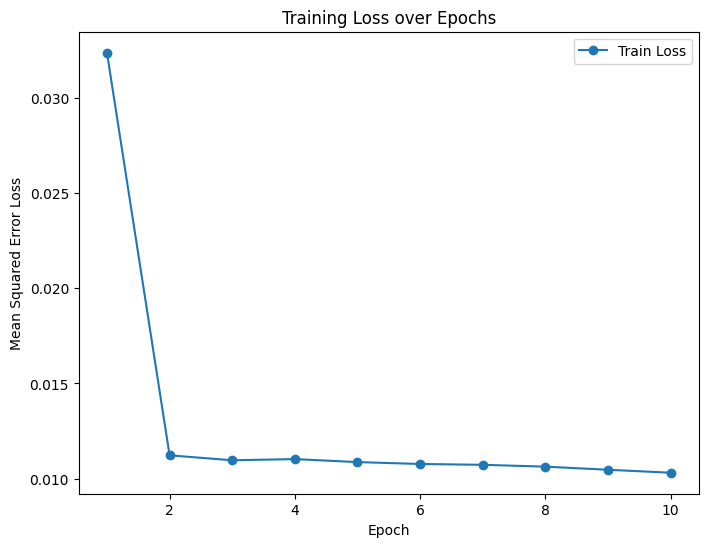

In [13]:
#Extract the loss values from the history
train_loss_history = history.history['loss']

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label='Train Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

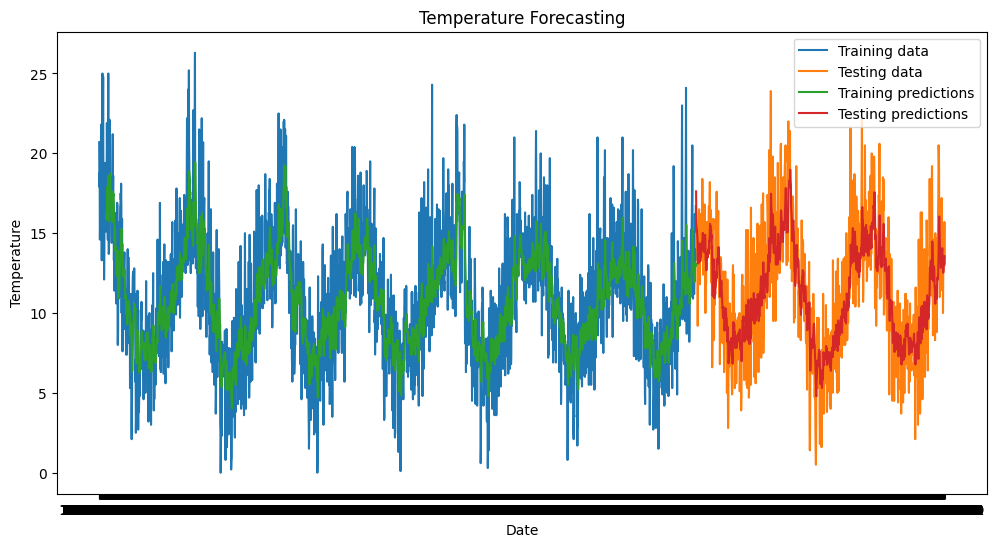

In [14]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][:train_size], df['Temp'][:train_size], label='Training data')
plt.plot(df['Date'][train_size+seq_length:], df['Temp'][train_size+seq_length:], label='Testing data')
plt.plot(df['Date'][seq_length:train_size], train_predictions, label='Training predictions')
plt.plot(df['Date'][train_size+seq_length:], test_predictions, label='Testing predictions')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Forecasting')
plt.legend()
plt.show()